# Homework #1
## Introduction to supervised learning

This colaboratory contains Homework #1 of the Machine Learning course, which is due **September 21, Sunday, midnight (23:59 EET time)**. To complete the homework, extract **(File -> Download .ipynb)** and submit to the course webpage.

**NB! Links to your colaboratory will not be accepted as a solution!**

## Submission's rules:

1. Please, submit only .ipynb that you extract from the Colaboratory. Submit your .ipynb to [course webpage](https://courses.cs.ut.ee/2024/ml/fall/Main/Homeworks).
2. Run your homework exercises before submitting (output should be present, preferably restart the kernel and press run all the cells).
3. Do not change the description of tasks in red (even if there is a typo|mistake|etc).
4. Please, make sure to avoid unnecessary long printouts.
5. Each task should be solved right under the question of the task and not elsewhere.
6. Solutions to both regular and bonus exercises should be submitted in the same .ipynb file.

Please, steer clear of copying someone else's work. If you discuss assignments with anyone in the course, please, mention their names here:
1. Pooh

##List of Homework's exercises:
1. [EX1](#scrollTo=tz9XASPxeqDC) - 3 points
2. [EX2](#scrollTo=BGVGqZGpxmzQ&uniqifier=1#) - 2 points
4. [EX3](#scrollTo=7p4GMeGK-QGL&uniqifier=1) - 1 points
5. [EX4](#scrollTo=nqV2c5sDc_f2&uniqifier=1) - 4 points
6. [Bonus 1](#scrollTo=_2T9ydozzcb-&uniqifier=1) - 2 points
7. [Bonus 2](#scrollTo=UkOtofaRjH8P&uniqifier=1) - up to 5 points

### Homework setup:
Here we will load necessary libraries (NumPy and Pandas) and MNIST dataset

In [26]:
import numpy as np # for matrix stuff
import pandas as pd # to work with datasets
import matplotlib.pyplot as plt # subjectively ugly plotting here
from seaborn import countplot # a bit less ugly plotting

# Getting MNIST one more time
from tensorflow.keras.datasets import mnist
(images, labels),(_, _) = mnist.load_data()
images = images / 255 # normalising images

print(f"images are of shape: {images.shape} and labels: {labels.shape}")

# Subsample the images
train_images = images[:2000]
train_labels = labels[:2000]

test_images = images[2000:3000]
test_labels = labels[2000:3000]

images are of shape: (60000, 28, 28) and labels: (60000,)


In [27]:
# CONTANTS

TRAIN_IMAGES_COUNT = 2000
TEST_IMAGES_COUNT = 1000

## Homework exercise 1 (3 points): KNN
**!! Please dont use red text, its painful to read. :-) !!**

<font color=''>One very popular variation of Nearest Neighbour is K-nearest neighbour. In this algorithm a label for a new instance is chosen by majority vote by **`k`** of its nearest neighbors.

<font color=''>The actual algorithm is not very different from vanilla nearest neighbour:

1. <font color=''> Calculate distances between the image you want to classify and all other images
2. <font color=''> Find the **`k`** closest images (you may consider using `np.argsort` function)
3. <font color=''> Report the most popular label from these **`k`**. (maybe `np.bincount` can help)

Eucledian distance ($L_2$)

$$L_2 = \sqrt{\sum{(x_1 - x_2)^2}}$$



<font color=''>**(Homework exercise 1- a)** Implement the aformentioned algorithm in the cell below (2.0 points)</font>

In [28]:
def dist(img1, img2):
  ##### YOUR CODE STARTS #####
  return np.sqrt(np.sum((img1 - img2)**2))
  ##### YOUR CODE ENDS #####

def classify_knn(image, k, train_images, train_labels):
  ##### YOUR CODE STARTS #####
  all_distances = [dist(image, img) for img in train_images]
  knn = np.argsort(all_distances)[:k]

  # Nearest neighbor
  #i = np.argmin(knn)
  #prediction = train_labels[i]

  # K-Nearest neighbor
  counts = train_labels[knn]
  prediction = np.bincount(counts).argmax()  # finds the most frequent value in an array
  ##### YOUR CODE ENDS #####
  return prediction

In [29]:
classify_knn(test_images[0], 5, train_images, train_labels)

np.int64(6)

Test the function on two first images from `test_images`:

In [30]:
##### YOUR CODE STARTS #####
print(f"Predicted class for the first image is {classify_knn(test_images[0], 500, train_images, train_labels)} and the true label is {test_labels[0]}")
print(f"Predicted class for the second image is {classify_knn(test_images[1], 500, train_images, train_labels)} and the true label is {test_labels[1]}")
##### YOUR CODE ENDS #####

Predicted class for the first image is 6 and the true label is 5
Predicted class for the second image is 8 and the true label is 8


<font color=''>**(Homework exercise 1- b)** Create a new function `classify_knn_print` from `classify_knn` that you have just implemented in **1- a**  by adding a print statement that outputs labels of K nearest neighbours. Report 10 nearest neighbours for the first two images from the `test_images`. Why do you think these digits were among the closest neighbours? (0.5 points) </font>

In [31]:
#def classify_knn_print(image, k, train_images, train_labels):
#  ##### YOUR CODE STARTS #####
#  all_distances = ...
#  knn = ...
#  counts = ...
#  print(...)
#  prediction = ...
#  ##### YOUR CODE ENDS #####
#  return prediction

def classify_knn_print(image, k, train_images, train_labels):
  ##### YOUR CODE STARTS #####
  all_distances = [dist(image, img) for img in train_images]
  knn = np.argsort(all_distances)[:k]

  # K-Nearest neighbor
  counts = train_labels[knn]
  prediction = np.bincount(counts).argmax()  # finds the most frequent value in an array

  print(
    f"The indices of the {k} nearest neighbors are: {knn[:10]}\n"
    f"Their labels are: {train_labels[knn][:10]}\n"
  )
  ##### YOUR CODE ENDS #####
  return prediction

In [32]:
##### YOUR CODE STARTS #####
print(f"Predicted class for the first image is {classify_knn_print(test_images[0], 500, train_images, train_labels)} and the true label is {test_labels[0]}")
print(f"Predicted class for the second image is {classify_knn_print(test_images[1], 500, train_images, train_labels)} and the true label is {test_labels[1]}")
##### YOUR CODE ENDS #####

The indices of the 500 nearest neighbors are: [ 578 1957 1328  782 1582 1898  940  100 1882 1257]
Their labels are: [6 6 5 9 6 6 9 5 9 6]

Predicted class for the first image is 6 and the true label is 5
The indices of the 500 nearest neighbors are: [1943  777   97   41  125  823 1101 1657  571 1749]
Their labels are: [8 8 8 8 8 8 8 8 8 8]

Predicted class for the second image is 8 and the true label is 8


Correct label of the first image is: 5


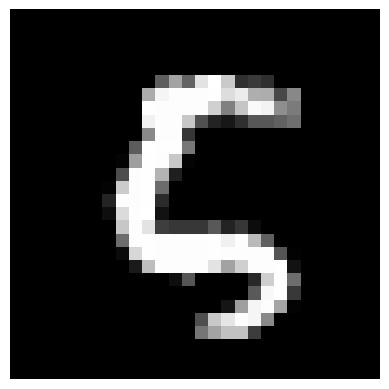

Correct label of the first image is: 8


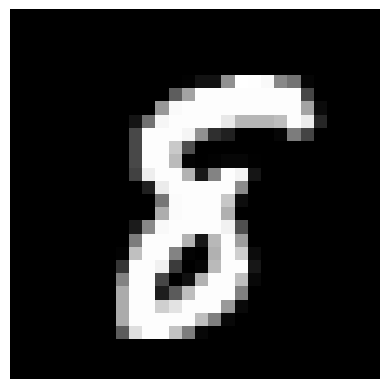

In [33]:
print (f"Correct label of the first image is: {test_labels[0]}")

plt.imshow(test_images[0], plt.get_cmap('gray'));
plt.axis('off')
plt.show()

print (f"Correct label of the first image is: {test_labels[1]}")

plt.imshow(test_images[1], plt.get_cmap('gray'));
plt.axis('off')
plt.show()

Answer to (b): All of these symbols could look similar in different handwriting styles. This 5 could really be confused with a 9 or a 6, and thats what we are seeing from the KNN output as well - this handwritten 5 looks really similar to those symbols.

<font color=''>**(Homework exercise 1- c)** Classify all test images using `classify_knn` (**please, do not use print version**) and store the predicted labels into a separate variable `test_predicted`, choose `k` = 5. Compute accuracy of your KNN model. (0.5 points) </font>

In [34]:
##### YOUR CODE STARTS #####
test_predicted = np.array([classify_knn(img, 5, train_images, train_labels) for img in test_images])
n_correct = np.sum(test_labels == test_predicted)
knn_accuracy = n_correct / len(test_labels)
##### YOUR CODE ENDS ##### (please do not delete this line)
print(f"Final accuracy of our nearest neighbor classifier is {knn_accuracy}. Not bad!")

Final accuracy of our nearest neighbor classifier is 0.912. Not bad!


## Homework exercise 2 (2 points): exploring misclassified examples
<font color=''>**(Homework exercise 2- a)** Modify the visualisation code that we used during the practice session to visualise a grid of example images from different classes. Now, instead of random examples from each class, visualise misclassified examples from each class. For example, in the first column visualise images that had true label `0` but were classified as something else, in the second column, show examples of images that had label `1` but were misclassified into another class and so on. Add a title to each small image, in the following format `true_label, predicted_label` e.g. "0, 6" - image of class 0 was classified as 6. (1.5 points)

**NB! you need a variable `test_predicted` to exist from the previous exercise to complete this exericse.** </font>

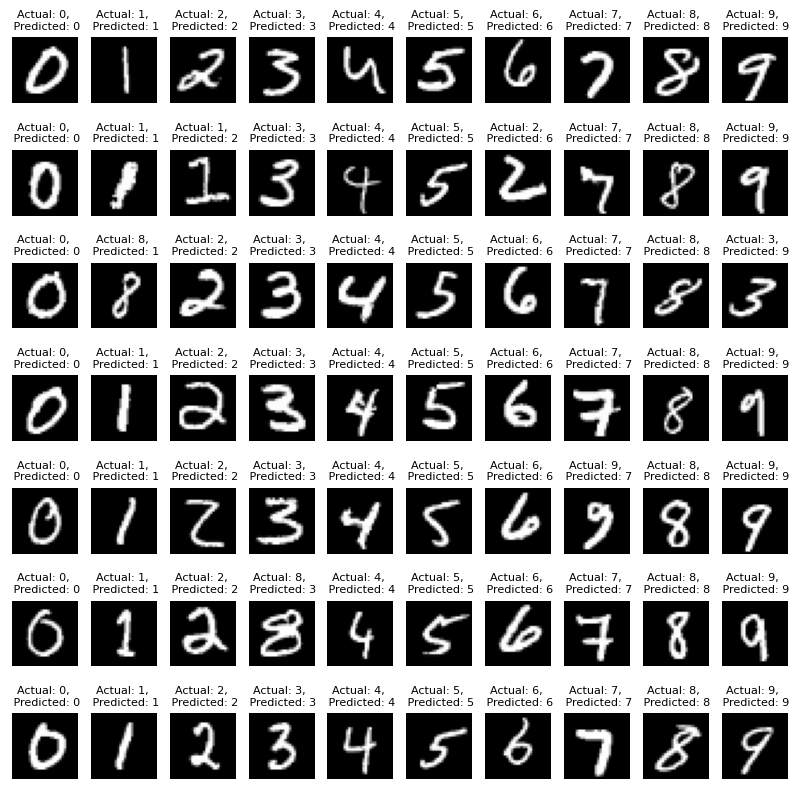

In [35]:
num_classes = 10
samples_per_class = 7 # Number of images from each class we want to see
fig, axs = plt.subplots(samples_per_class, num_classes, figsize=(10.0, 10.0))
for i in range(num_classes):
    ##### YOUR CODE STARTS #####
    # Find indices where true label is i but prediction is different
    idxs = np.where(test_predicted == i)[0]

    chosen = np.random.choice(idxs, samples_per_class, replace=False)

    for j, id in enumerate(chosen):
        axs[j, i].imshow(test_images[id], cmap='gray')
        axs[j, i].set_title(f"Actual: {test_labels[id]}, \n Predicted: {test_predicted[id]}", fontsize=8)
        axs[j, i].axis('off')
    ##### YOUR CODE ENDS #####
plt.setp(axs,xticks=[],yticks=[]) # set all axes off
plt.show()

We misclassified 88 out of 1000 images
[0 0 3 2 0 1 1 3 1 0]


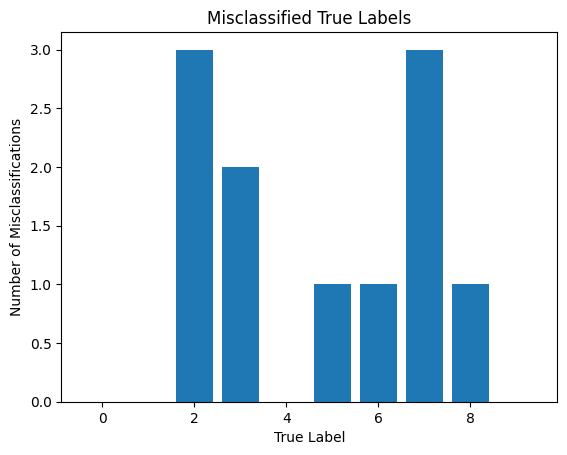

In [36]:
misclassified = np.flatnonzero(test_labels != test_predicted)
print(f"We misclassified {len(misclassified)} out of {len(test_labels)} images")

bins = []

for i in range(11):
	bins.append(test_labels[misclassified[i]])

bins = np.bincount(bins, minlength=10)

print(bins)

plt.bar(np.arange(len(bins)), bins)
plt.xlabel("True Label")
plt.ylabel("Number of Misclassifications")
plt.title("Misclassified True Labels")
plt.show()


<font color=''>**(Homework exercise 2- b)** Take a careful look at the resulting figure. Are all classes equally missclassified? Why? Are there any classes that KNN confuses more often, why? (0.5 points) </font>

Answer to (b): Nope, number 2 and 7 were more often misclassifed than others. Also 0, 1, 4 and 9 were never misclassified.

## Preparation for homework exercises 3 and 4
Next we will work with real-world dataset collected from taxis operating in New York City that we have already discussed during our practice sessions. This dataset provides comprehensive trip records of taxi rides, including information such as pickup and drop-off times, passenger count, trip distance, and fare details.

In [37]:
## Fix for Google authentification
#import os
#os.environ['USE_AUTH_EPHEM'] = '0'

In [38]:
## Code to read csv file into Colaboratory:
#!pip install -U -q PyDrive
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials

## Authenticate and create the PyDrive client.
#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)

#link = 'https://drive.google.com/file/d/1XKhfq4WFHlTrvag48cD3VDJGfykYUJ-s' # The shareable link

In [39]:
#downloaded = drive.CreateFile({'id':'1XKhfq4WFHlTrvag48cD3VDJGfykYUJ-s'})
#downloaded.GetContentFile('nyc_data_2.zip')

## After archive has been downloaded
## unzip it
#!unzip nyc_data_2.zip

* `train_2M.csv` contains 2 million observations from NYC dataset (6 independent variables and fare_amount that we need to predict).
* `test.csv` contains new observations, for which we have to estimate `fare_amount` based on train data.
* `sample_submission.csv` - a sample submission file in the correct format (columns `key` and `fare_amount`). Every row in this file matches every row in `test.csv`.
* `model.pickle` - file that contains trained model saved as a pickle (we are going to deal with it later)

## Homework exercise 3 (1 point): read and explore `model.pickle`

<font color=''> **(Homework exercise 3- a)** In this exercise we will use module `pickle` that let's you store your machine learning models as files. Later you can share these models (aka pickles) with your colleagues or your future self.

<font color=''> In this exercise, use `pickle` module to read in `model.pickle` file that you have downloaded from `nyc_data_2.zip` using `pickle.load()` function. For details consult the documentation page: https://docs.python.org/3/library/pickle.html. (0.5 points)

In [40]:
import pickle
import os

##### YOUR CODE STARTS #####
filename = "model.pickle"

if os.path.exists(filename):
    with open(filename, 'rb') as f:
        model = pickle.load(f)
    print("Model loaded from disk")
##### YOUR CODE ENDS #####

Model loaded from disk


C:\Users\Saskia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.0.2 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


<font color=''> **(Homework exercise 3- b)** next, explore the object using function `dir` and answer the following questions:
* <font color=''> Which model was saved into this object?
* <font color=''> How many coefficients it has and what are their values?
* <font color=''>Can you find out which features have been used for training?

<font color=''>(0.5 points)


In [41]:
print(dir(model))

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__firstlineno__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__sklearn_tags__', '__static_attributes__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_build_request_for_signature', '_decision_function', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_estimator_type', '_get_default_requests', '_get_doc_link', '_get_metadata_request', '_get_param_names', '_get_params_html', '_html_repr', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_residues', '_set_intercept', '_validate_params', 'coef_', 'copy_X', 'feature_names_in_', 'fit', 'fit_intercept', 'get_metadata_rou

In [42]:
print(type(model))

<class 'sklearn.linear_model._base.LinearRegression'>


In [43]:
print(model.coef_)
print(model.coef_.shape[1])

[[1.46111427e+02 8.92591108e+01 5.23209145e-02]]
3


In [44]:
print(model.feature_names_in_)

['abs_diff_longitude' 'abs_diff_latitude' 'passenger_count']


Answers to (b): 
* LinearRegression
* 3 coefficients, values: [1.46111427e+02 8.92591108e+01 5.23209145e-02]
* fetures: ['abs_diff_longitude' 'abs_diff_latitude' 'passenger_count']

### Setting up Kaggle

You need to have an account on Kaggle.com, before you proceed to the last exercise. When in your account, you need to download your API Token from kaggle. It's very easy:
1. Click on your profile icon
2. Go to **Account**
3. In **API** you press **Create new API token**

Now we load the file **kaggle.json** that you have downloaded, into this notebook:

In [45]:
#from google.colab import files

#files.upload();

The next cell moves the file into a separate folder, sets secure access for it and configures your Kaggle profile for this notebook.

In [46]:
#import json

#!mkdir /root/.kaggle/
#!mv kaggle.json /root/.kaggle/kaggle.json
#!chmod 600 ~/.kaggle/kaggle.json
#!kaggle config set -n path -v{/content}

In [47]:
# Im runnging this on my local machine, so I need to set the path to my .kaggle folder
import json

!kaggle config set -n path -v C:\Users\Saskia\.kaggle

- path is now set to: C:\Users\Saskia\.kaggle


In order to sign up for a NYC Taxi competition you need to accept the rules by cliking on "Late submission" button in the upper right corner: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction

Make a test submission to ensure that the submission mechanism works

In [48]:
!kaggle competitions submit -c new-york-city-taxi-fare-prediction -f sample_submission.csv -m "Sample submission test"

Successfully submitted to New York City Taxi Fare Prediction



  0%|          | 0.00/335k [00:00<?, ?B/s]
  5%|▍         | 16.0k/335k [00:00<00:15, 21.2kB/s]
 29%|██▊       | 96.0k/335k [00:00<00:01, 126kB/s] 
 38%|███▊      | 128k/335k [00:01<00:02, 101kB/s] 
 48%|████▊     | 160k/335k [00:01<00:02, 87.6kB/s]
 53%|█████▎    | 176k/335k [00:02<00:01, 84.5kB/s]
 57%|█████▋    | 192k/335k [00:02<00:02, 66.0kB/s]
 67%|██████▋   | 224k/335k [00:02<00:01, 79.8kB/s]
 72%|███████▏  | 240k/335k [00:02<00:01, 86.3kB/s]
 76%|███████▋  | 256k/335k [00:03<00:00, 87.3kB/s]
 81%|████████  | 272k/335k [00:03<00:00, 88.1kB/s]
 86%|████████▌ | 288k/335k [00:03<00:00, 92.8kB/s]
 91%|█████████ | 304k/335k [00:03<00:00, 72.0kB/s]
 95%|█████████▌| 320k/335k [00:04<00:00, 72.3kB/s]
100%|██████████| 335k/335k [00:04<00:00, 72.7kB/s]
100%|██████████| 335k/335k [00:05<00:00, 62.0kB/s]


Now you can check `My submissions` tab on the website: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/submissions

## Read in the NYC data and perform basic preprocessing

In [49]:
%%time

# note that we use only 1M out of 2M records
train =  pd.read_csv('train_2M.csv', parse_dates=["pickup_datetime"], nrows = 1_000_000) # the first row will automatically be interpreted as a header

# functions that add two new features abs_diff_longitude and abs_diff_latitude
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()

# adding two new features to train
add_travel_vector_features(train)

# reading in test and adding two new features to test
test = pd.read_csv('test.csv')
add_travel_vector_features(test)

# removing not available values and outliers
train = train.dropna(how = 'any', axis = 'rows')
train = train[(train.abs_diff_longitude < 5.0) & (train.abs_diff_latitude < 5.0)]

X = train.drop('fare_amount', axis=1)
y = train['fare_amount']

CPU times: total: 1.39 s
Wall time: 1.39 s


## Homework exercise 4 (4 points): K-fold cross-validation algorithm
<font color=''> In the classroom we were cheating on our validation data when we hand-picked the number of decision trees (as we used validation data multiple times). The honest and better way of finding a good hyperparameter (depth of the tree) is a **K-fold cross-validation algorithm**.


<font color=''> **(Homework exercise 4- a)** Implement the K-fold cross-validation algorithm using lecture slides and hints in comments. Use `abs_diff_longitude` and `abs_diff_latitude` featues and the K-fold cross-validation to find the most suitable depth of the tree. Report that depth below after the illustration.  (3.5 points) </font>

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error

# Fixing randomness, please do not change this line.
np.random.seed(1111)

max_depths = [1, 2, 5, 8, 9, 10, 11, 12, 13, 15, 20]
depth_RMSEs = list()

# 4-fold cross validation
for param in max_depths:
  print(f'Calculating RMSE for tree with a depth {param}...')
  ##### YOUR CODE STARTS #####
  # number of folds
  n_folds = 4

  # create a vector of fold indices
  # with length of this vector equal to number of rows in training data
  # you can use np.concatenate and np.repeat functions
  folds_indx = np.tile(np.arange(n_folds), int(np.ceil(len(X) / n_folds)))[:len(X)]

  # for dataset with 8 entries you should get:
  # the following vector[0, 0, 1, 1, 2, 2, 3, 3]
  # chunks can be unequal if the number of rows is not divisible by 4

  # randomly shuffle the obtained indices
  np.random.shuffle(folds_indx)

  # initialise variable that will hold RMSEs for each fold
  fold_RMSEs = np.zeros(n_folds)
  for fold_indx in np.arange(n_folds):

    # split data into train_X, train_y and val_X, val_y depending on the fold
    # use previously generated folds_indx to fetch the right rows
    train_X =  X[folds_indx != fold_indx]
    train_y = y[folds_indx != fold_indx]
    val_X = X[folds_indx == fold_indx]
    val_y = y[folds_indx == fold_indx]

    # a few tests that must pass to make sure you are doing the right thing
    # please, do not delete these lines
    assert len(train_X) + len(val_X) == len(X), "Train and validation sets combined should be equal to the size of the original dataset"
    assert len(train_X) > len(val_X), "Train set should be larger than validation set (at least three times)"
    assert len(train_X) == 748518 or len(train_X) == 748519, "Train set should be of size 748518 or 748519"

    # train the decision tree with max_depth = param
    dtr = DecisionTreeRegressor(max_depth=param)

    # fit the decision tree on training data
    dtr.fit(train_X[['abs_diff_longitude', 'abs_diff_latitude']], train_y)

    # predict validation data
    val_predictions = dtr.predict(val_X[['abs_diff_longitude', 'abs_diff_latitude']])

    # calculate RMSE on validation for this fold
    fold_RMSEs[fold_indx] = root_mean_squared_error(val_y, val_predictions)
  ##### YOUR CODE ENDS #####
  print(f'Average validation RMSE for {param} of trees is {np.mean(fold_RMSEs)}')
  depth_RMSEs.append(np.mean(fold_RMSEs))

Calculating RMSE for tree with a depth 1...
Average validation RMSE for 1 of trees is 7.185312292506166
Calculating RMSE for tree with a depth 2...
Average validation RMSE for 2 of trees is 6.030739885891437
Calculating RMSE for tree with a depth 5...
Average validation RMSE for 5 of trees is 5.210960406806171
Calculating RMSE for tree with a depth 8...
Average validation RMSE for 8 of trees is 5.042843837341425
Calculating RMSE for tree with a depth 9...
Average validation RMSE for 9 of trees is 5.031425706976173
Calculating RMSE for tree with a depth 10...
Average validation RMSE for 10 of trees is 5.085880959032558
Calculating RMSE for tree with a depth 11...
Average validation RMSE for 11 of trees is 5.085582961737597
Calculating RMSE for tree with a depth 12...
Average validation RMSE for 12 of trees is 5.158731636170135
Calculating RMSE for tree with a depth 13...
Average validation RMSE for 13 of trees is 5.224637902268082
Calculating RMSE for tree with a depth 15...
Average val

<font color=''> In the cell below, plot the resulting RMSEs for each max depth as a **lineplot**. Report the most optimal depth of the decision tree.

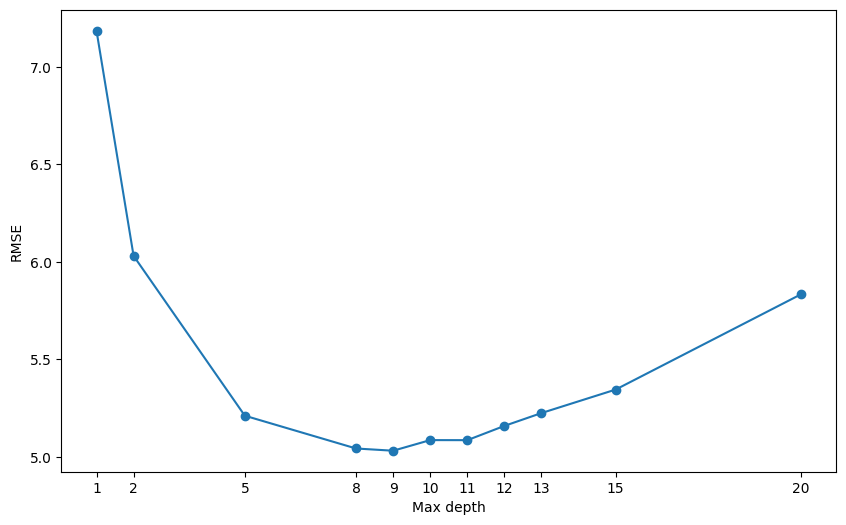

In [51]:
##### YOUR CODE STARTS #####
plt.figure(figsize=(10,6))
plt.plot(max_depths, depth_RMSEs, marker='o')
##### YOUR CODE ENDS #####
plt.xticks(max_depths)
plt.xlabel("Max depth")
plt.ylabel("RMSE")
plt.show()

According to the above figure, the most optimal decision tree depth is **9**.

<font color=''> **(Homework exercise 4- b)** Based on above results train the `DecisionTreeRegressor` on the entire training data (use all the training datapoints, but still only the same features that were used in the task before). Use **the optimal tree depth** that you reported in **4 -a**. Predict the test set and submit the results to Kaggle. Check your results online and print out your new leaderboard score, which should be smaller than 4.02083. (0.5 points) </font>

In [52]:
##### YOUR CODE STARTS #####


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np

np.random.seed(1111)
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1111, test_size = 0.20)
features = ['abs_diff_longitude', 'abs_diff_latitude']

dtr = DecisionTreeRegressor(max_depth=9)
dtr.fit(train_X[features], train_y)
test_predictions = dtr.predict(test[features])

submission = pd.DataFrame(
    {'key': test.key, 'fare_amount': test_predictions},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission_dt.csv', index = False)

# Submit to Kaggle
!kaggle competitions submit -c new-york-city-taxi-fare-prediction -f submission_dt.csv -m "Decision Tree with depth 9"



# just copy paste your new score below:
print(f"My new score is {3.99088}")
##### YOUR CODE ENDS #####

Successfully submitted to New York City Taxi Fare Prediction
My new score is 3.99088



  0%|          | 0.00/465k [00:00<?, ?B/s]
  3%|▎         | 16.0k/465k [00:00<00:18, 24.5kB/s]
 21%|██        | 96.0k/465k [00:00<00:02, 150kB/s] 
 28%|██▊       | 128k/465k [00:01<00:02, 143kB/s] 
 34%|███▍      | 160k/465k [00:01<00:02, 123kB/s]
 41%|████▏     | 192k/465k [00:01<00:02, 98.3kB/s]
 45%|████▍     | 208k/465k [00:02<00:02, 96.5kB/s]
 48%|████▊     | 224k/465k [00:02<00:02, 91.8kB/s]
 52%|█████▏    | 240k/465k [00:02<00:02, 82.9kB/s]
 55%|█████▌    | 256k/465k [00:02<00:02, 85.5kB/s]
 58%|█████▊    | 272k/465k [00:02<00:02, 83.4kB/s]
 62%|██████▏   | 288k/465k [00:03<00:02, 79.0kB/s]
 65%|██████▌   | 304k/465k [00:03<00:02, 78.3kB/s]
 69%|██████▉   | 320k/465k [00:03<00:01, 77.7kB/s]
 72%|███████▏  | 336k/465k [00:03<00:01, 77.9kB/s]
 76%|███████▌  | 352k/465k [00:04<00:01, 77.2kB/s]
 79%|███████▉  | 368k/465k [00:04<00:01, 89.0kB/s]
 83%|████████▎ | 384k/465k [00:04<00:00, 89.5kB/s]
 86%|████████▌ | 400k/465k [00:04<00:00, 97.7kB/s]
 89%|████████▉ | 416k/465k [00:04<00:

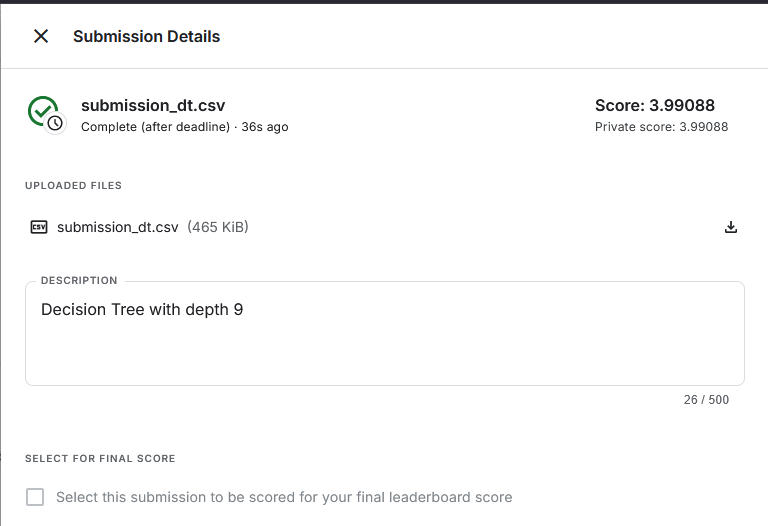

# Bonus exercises
**NB, these are optional exercises! These will be graded more strictly, hence you really need to impress with high quality of the solution to earn points. Add elaborate explanations and cool visuals.**

## Bonus exercise 1 (2 bonus points):

<font color=''> Visualising misclassified examples can help to debug the classification algorithm. But misclassified examples may have different probabilities. In this bonus exercise (optional) try modifying code we have written for the homework exercise 2 so that title now would include probability of a true class and of a wrong class. You would probably need to change the code of `classify_knn` function. Describe the results. </font>

## Bonus exercise 2 (up to 5 points): the grand challenge
<font color=''> Try to get into top 300 places on public leaderboard (RMSE < 3.04) using different ML algorithms with different parameters, more features, more data, better preprocessing. Here are some ideas for improvement:
* Use more data (we only took 1M out of 2M, there are 53M more on the website)
* Do more preprocessing (remember negative prices or unrealistic numbers of passengers?)
* Use more/better features (e.g. euclidean distance, or google what is haversine distance)
* Use some other regression algorithm (e.g. look into RandomForestRegressor from sklearn.ensemble)
* Tune parameters of these algorithms
* Try something else!
</font>

<font color=''>You should make a small post here with code and elaborate explanations of what you have tried (do it even you did not manage to break into top 300). **Report your final leaderboard rank**. Number of points would depend on quality of your explanations and the resulting rank.</font>


In [53]:
# Hint:
R = 6378

def haversine_distance(lon1, lon2, lat1, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.

    source: https://stackoverflow.com/a/29546836

    """
    # Convert latitude and longitude to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # Find the differences
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # Apply the formula
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    # Calculate the angle (in radians)
    c = 2 * np.arcsin(np.sqrt(a))
    # Convert to kilometers
    km = R * c

    return km

# Comments (optional feedback to the course instructors)
Here, please, leave your comments regarding the homework, possibly answering the following questions:
* how much time did you spend on this homework? 4h
* was it too hard/easy for you? The first part was easy, the secod part was quite hard, especially the last exercise 4a. We didnt do anything like that in the practice sessions :(
* what would you suggest to add or remove? Improve 4a-s instructions, so its easier to understand what is expected. Perhaps add some hints or links to relevant materials. I have no idea if I did 4a correctly.
* anything else you would like to tell us

Your comments:

# <font color=''>  End of the homework. Please don't delete this cell.</font>